In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
# Import library and dataset
import pandas as pd  # data processing
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(style="whitegrid", font_scale=1.75)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Input data files are available in the read-only 
# Jan 2017 data is stored in train_file and feb 2017 data is stored in Feb 2017
#It is important to do date parsing as the date format here has Am,Pm details attached
df1 = pd.read_csv("C:/Users/skurella/Downloads/evoke/train.csv",parse_dates = ['lpep_pickup_datetime','lpep_dropoff_datetime'])
df4 = pd.read_csv("C:/Users/skurella/Downloads/evoke/test.csv",parse_dates = ['lpep_pickup_datetime','lpep_dropoff_datetime'])


In [3]:
#Combined two files to perform date _preprocessing
combined = [df1,df4]
df = pd.concat(combined)

In [4]:
#Checking Total count and datatype details 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061573 entries, 0 to 991308
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     object        
 4   RatecodeID             int64         
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   passenger_count        int64         
 8   trip_distance          float64       
 9   fare_amount            object        
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           object        
 14  ehail_fee              float64       
 15  improvement_surcharge  float64       
 16  total_amount           object        
 17  payment_type           int64         
 18  trip_type              

In [5]:
#Numerical data is considered as object type while loading
#conversion of datataype to numeric
for col in ['fare_amount','total_amount','tolls_amount']:
    
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                         int64
dtype: object


In [6]:
#checking descriptive statistics for each of the numerical columns
df.describe()
#Statistics show up:


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,2.061573e+06,2.061573e+06,2.061573e+06,2.061573e+06,2.061573e+06,2.061573e+06,2.061572e+06,2.061573e+06,2.061573e+06,2.061573e+06,2.061572e+06,0.0,2.061573e+06,2.061571e+06,2.061573e+06,2.061573e+06
mean,1.797491e+00,1.082599e+00,1.128559e+02,1.291560e+02,1.366026e+00,2.583261e+00,1.130885e+01,3.569193e-01,4.873138e-01,1.140386e+00,8.592055e-02,NaN,2.926460e-01,1.371119e+01,1.514203e+00,1.019732e+00
std,4.018699e-01,5.641565e-01,7.657015e+01,7.753726e+01,1.041967e+00,2.707957e+00,8.902687e+00,3.859103e-01,8.500933e-02,2.166117e+00,1.555623e+00,NaN,5.034080e-02,1.031092e+01,5.247628e-01,1.390780e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.180800e+02,-4.500000e+00,-5.000000e-01,-1.010000e+02,-1.108000e+01,NaN,-3.000000e-01,-2.180800e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.690000e+00,8.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.680000e+02,1.930000e+02,1.000000e+00,3.200000e+00,1.350000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,NaN,3.000000e-01,1.630000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,1.716500e+02,6.205000e+02,4.500000e+00,8.100000e-01,3.030000e+02,7.955400e+02,NaN,3.000000e-01,8.043400e+02,5.000000e+00,2.000000e+00


In [7]:
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:00:01,2017-01-01 00:00:05,N,5,36,36,1,0.00,3.0,0.0,0.0,0.00,0.0,NaN,0.0,3.00,1,2
1,2,2017-01-01 00:00:08,2017-01-01 00:05:16,N,1,189,25,1,1.05,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1
2,2,2017-01-01 00:00:16,2017-01-01 00:06:17,N,1,117,117,1,1.82,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,1,1
3,2,2017-01-01 00:00:19,2017-01-01 00:07:04,N,1,166,238,1,1.30,7.0,0.5,0.5,2.49,0.0,NaN,0.3,10.79,1,1
4,2,2017-01-01 00:00:22,2017-01-01 00:06:58,N,1,61,225,3,1.84,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1


In [8]:
#ehai_fee column is deleted as 99% of column in empty.And it doesnt contribute to analysis
df.drop(['ehail_fee'], axis = 'columns' ,inplace = True)

In [9]:
## fixing all irregularities by adding filters on the initial dataset. Remove all NaN value rows and removing duplicates if any.
#Payment Type = Credit_Card(1) ,trip Distance = 0-50 ,Passenger count < = 6 ,Mta_tax = 0.5(from document) ,Tolls_amount < 30 ,tip_amount<502.5 <=Fare_amount <=250

df = df[((df['payment_type'] == 1) & (df['trip_distance'] >= 0.0) & (df['trip_distance'] <= 50.0) & (df['passenger_count'] >= 1.0) &(df['passenger_count'] <= 6.0 ) & (df['mta_tax'] == 0.5) & (df['tolls_amount'] >=  0.0) & (df['tolls_amount']<=30.0) & (df['tip_amount'] >=  0.0) & (df['tip_amount']<=50.0) & (df['fare_amount'] >= 2.5) & (df['fare_amount']<=250.0) ) ]
    
df= df.drop_duplicates()  
    
    

In [10]:
df= df.dropna()

In [11]:
#Additional columns were created to understand the trend of trips with respect to time(hours,weekdays,weekends)
df['pickup_day'] = df.lpep_pickup_datetime.dt.dayofweek
df['pickup_weekday'] = df.lpep_pickup_datetime.dt.weekday
df['pickup_hour'] = df.lpep_pickup_datetime.dt.hour

df['drop_day'] = df.lpep_dropoff_datetime.dt.dayofweek
df['drop_weekday'] = df.lpep_dropoff_datetime.dt.weekday
df['drop_hour'] = df.lpep_dropoff_datetime.dt.hour

(df['pickup_hour'] == df['drop_hour']).all()

False

In [12]:
clean_df = df.copy()

In [13]:
clean_df['payment_type'].value_counts()

1    1004745
Name: payment_type, dtype: int64

In [14]:
#convert into numerical form since it is categorical.  map text values with numerical ones.
#It can be done using label encoding also
d = {'N' : 0 ,'Y' : 1}
clean_df['store_and_fwd_flag'] = clean_df['store_and_fwd_flag'].map(d).fillna(clean_df['store_and_fwd_flag'])
clean_df['store_and_fwd_flag'].value_counts()
print(clean_df)

        VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
2              2  2017-01-01 00:00:16   2017-01-01 00:06:17   
3              2  2017-01-01 00:00:19   2017-01-01 00:07:04   
7              2  2017-01-01 00:00:28   2017-01-01 00:13:31   
10             2  2017-01-01 00:00:30   2017-01-01 00:07:00   
12             2  2017-01-01 00:00:39   2017-01-01 00:09:08   
...          ...                  ...                   ...   
991295         2  2017-02-27 23:58:57   2017-02-28 00:22:45   
991296         2  2017-02-27 23:59:03   2017-02-28 00:07:32   
991299         1  2017-02-27 23:59:17   2017-02-28 00:15:42   
991304         2  2017-02-27 23:59:33   2017-02-28 00:03:08   
991306         2  2017-02-27 23:59:38   2017-02-28 00:11:21   

        store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
2                        0           1           117           117   
3                        0           1           166           238   
7                        0       

In [15]:
df2 = clean_df.copy()


In [16]:
#trip_duration which will be calculated from the difference between the dropoff time and the pickup time and I express the value in minutes unit as shown below:.
#It can be useful when duration of trip to be estimated or predicted.
duration = df2['lpep_dropoff_datetime']-df2['lpep_pickup_datetime']
df2['trip_duration'] = duration/np.timedelta64(1,'m')

In [17]:
#Sub groups were created based on trip duration .This subclasses allow to understand & classify trip duration .
#Allow to understand trip time.
intervals = np.array([0,5,10,25,40,50])
df2['trip_duration'] = pd.cut(df2.trip_duration,intervals,labels = ['<5','5-15','15-25','25-40','>40'])
df2['trip_duration'].value_counts()

15-25    418708
5-15     315054
<5       161689
25-40     82660
>40       12801
Name: trip_duration, dtype: int64

In [18]:
#Dummies were created to convert to continuous variable
trip_duration = pd.get_dummies(df2['trip_duration'])

In [19]:
trip_duration.head()

,<5,5-15,15-25,25-40,>40
2,0,1,0,0,0
3,0,1,0,0,0
7,0,0,1,0,0
10,0,1,0,0,0
12,0,1,0,0,0


In [20]:
#Subclasses were divided with column name to easy identification
quick_trip = trip_duration.iloc[:,:1].max(axis =1)
very_short_trip = trip_duration.iloc[:,:2].max(axis =1)
short_trip = trip_duration.iloc[:,:3].max(axis =1)
medium_trip = trip_duration.iloc[:,:4].max(axis =1)
long_trip = trip_duration.iloc[:,:5].max(axis =1)
trip_duration.columns = ['quick_trip','very_short_trip','short_trip','medium_trip','long_trip']

In [21]:
df2 = pd.concat([df2,quick_trip,very_short_trip,short_trip,medium_trip,long_trip],axis = 1)

In [22]:
df2.columns = ['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag', 'RatecodeID','PULocationID', 'DOLocationID','passenger_count','trip_distance', 'fare_amount', 'extra','mta_tax','tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount','payment_type','trip_type', 'pickup_day', 'pickup_weekday','pickup_hour','drop_day','drop_weekday', 'drop_hour','trip_duration','quick_trip','very_short_trip','short_trip','medium_trip','long_trip']
                    

In [23]:
#Data preprocessing is completed at this step.Using row indexing feb month data is created as new dataframe 
data1= df2[df2['lpep_pickup_datetime'].dt.month == 1]
#print(df3.count())
data2= df2[df2['lpep_pickup_datetime'].dt.month == 2]
#print(df4.count())

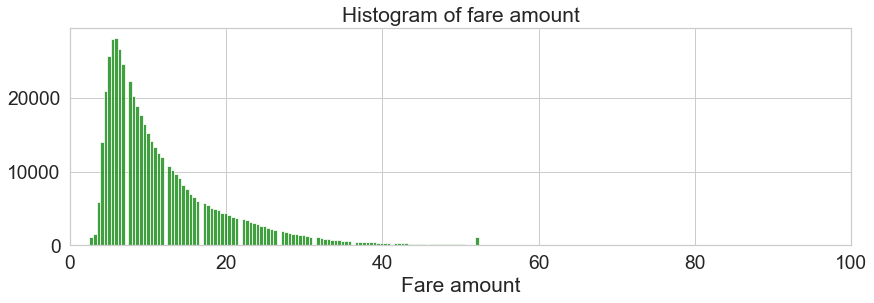

In [24]:
#Distribtion of fare amount
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(data1.fare_amount, 500, facecolor='green', alpha=0.75)
plt.xlabel('Fare amount') 
plt.title('Histogram of fare amount') 
plt.xlim(0, 100)
plt.show(); 

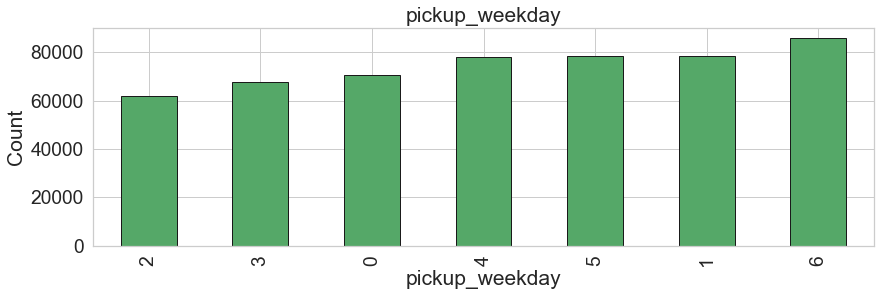

In [25]:
#To understand trips distibution on days of week.
plt.figure(figsize = (14, 4))
data1['pickup_weekday'].value_counts().sort_values().plot.bar(color = 'g', edgecolor = 'k');
plt.title('pickup_weekday');
plt.xlabel('pickup_weekday'); 
plt.ylabel('Count'); 
#As per the image below ,there are more number of trips on thursday,friday,saturday

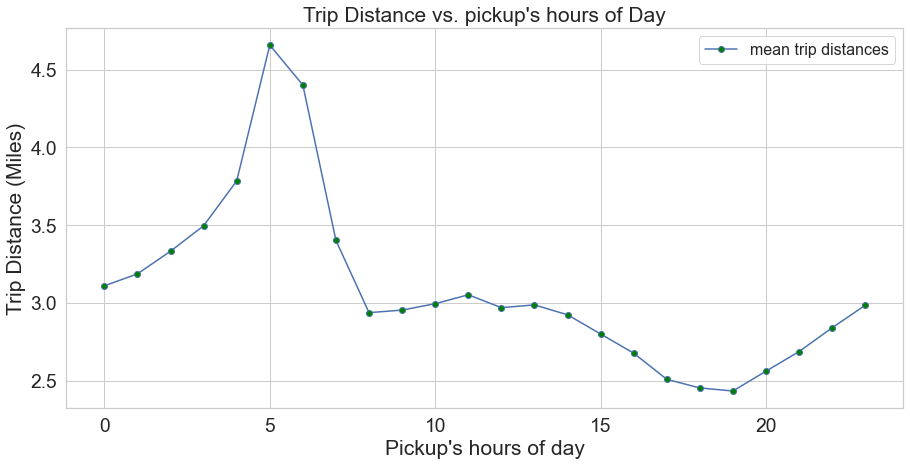

In [26]:
#Taxi trip repartition by hour of the day
pickups=data1.groupby('pickup_hour', as_index=False)['trip_distance'].mean() 
plt.figure(figsize = (15,7)) 
plt.plot(pickups['pickup_hour'],pickups['trip_distance'], marker='o', markerfacecolor='green', label='mean trip distances')
plt.title("Trip Distance vs. pickup's hours of Day")
plt.xlabel("Pickup's hours of day")
plt.ylabel("Trip Distance (Miles)") 
plt.legend(loc='best',fontsize=16) 


<Figure size 864x360 with 0 Axes>

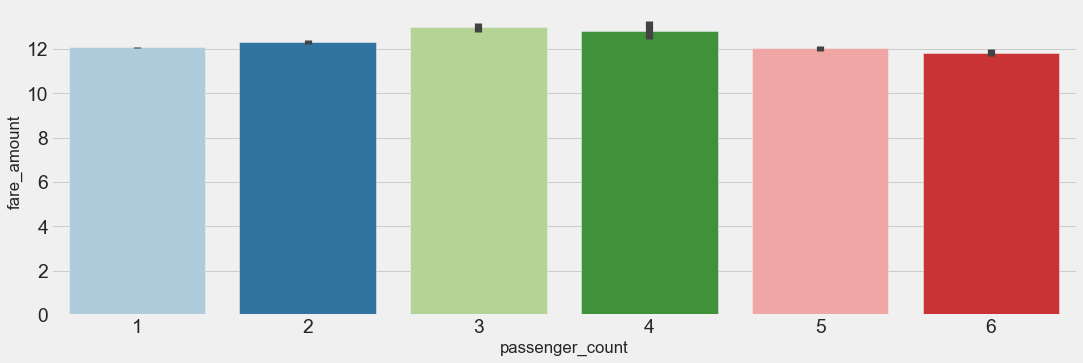

In [27]:
plt.style.use('fivethirtyeight');
plt.rcParams['font.size'] = 14;
plt.figure(figsize=(12,5));
palette = sns.color_palette('Paired', 10);
sns.catplot(x="passenger_count", y="fare_amount", palette=palette, data=data1, kind="bar", aspect=3)
sns.despine()
plt.show()


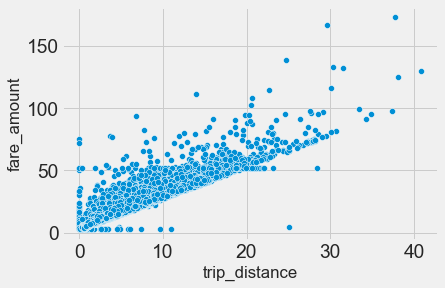

In [28]:
sns.scatterplot(x="trip_distance", y="fare_amount", data=data1[data1.trip_distance < 80].sample(100000))
plt.show()

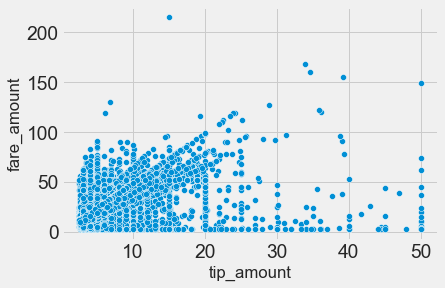

In [29]:
sns.scatterplot(x="tip_amount", y="fare_amount", data=data1[data1.tip_amount > 2.5].sample(100000))
plt.show()

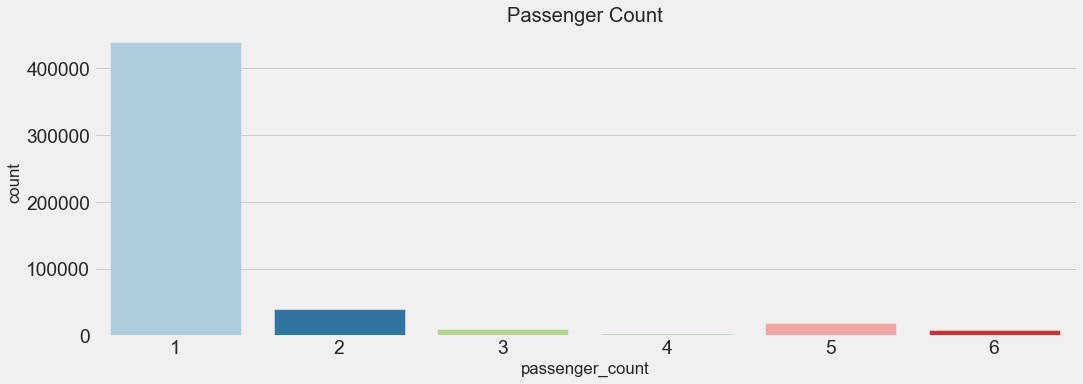

In [30]:
sns.catplot(x="passenger_count", kind="count", palette=palette, data=data1, height=5, aspect=3);
sns.despine()
plt.title('Passenger Count');
plt.show()

<AxesSubplot:>

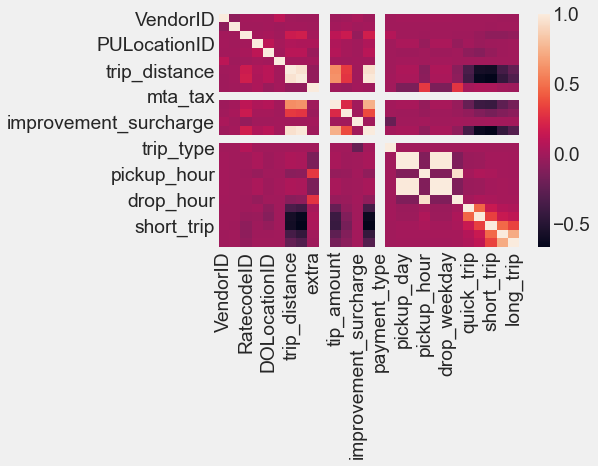

In [31]:
# check for positive correlation with the target (tip_amount) 
sns.heatmap(data1.corr())

In [32]:
df.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,pickup_day,pickup_weekday,pickup_hour,drop_day,drop_weekday,drop_hour
VendorID,1.000000,0.005959,0.012459,0.003824,0.101413,-0.002031,-0.008981,-0.007072,NaN,-0.013608,...,0.018230,-0.006793,NaN,-0.002035,0.008376,0.008376,0.009379,0.008016,0.008016,0.007535
RatecodeID,0.005959,1.000000,0.007358,0.022163,-0.002748,0.168361,0.188290,0.010868,NaN,0.115346,...,-0.058641,0.193373,NaN,0.066091,-0.003231,-0.003231,-0.009710,-0.003178,-0.003178,-0.008071
PULocationID,0.012459,0.007358,1.000000,0.108624,0.017082,0.057897,0.049123,0.044332,NaN,0.050527,...,-0.000410,0.054044,NaN,0.001259,0.038223,0.038223,-0.045413,0.038505,0.038505,-0.052036
DOLocationID,0.003824,0.022163,0.108624,1.000000,0.002799,0.088911,0.090682,-0.027857,NaN,0.069503,...,-0.001684,0.089317,NaN,0.000830,-0.016757,-0.016757,-0.006212,-0.016586,-0.016586,-0.003422
passenger_count,0.101413,-0.002748,0.017082,0.002799,1.000000,0.002915,0.001982,0.009504,NaN,0.004966,...,0.002247,0.003370,NaN,0.000075,0.010929,0.010929,0.001247,0.010945,0.010945,0.000441
trip_distance,-0.002031,0.168361,0.057897,0.088911,0.002915,1.000000,0.960076,-0.047830,NaN,0.608136,...,0.000226,0.947251,NaN,0.001539,0.040148,0.040148,-0.085161,0.040564,0.040564,-0.084900
fare_amount,-0.008981,0.188290,0.049123,0.090682,0.001982,0.960076,1.000000,-0.052105,NaN,0.624106,...,-0.002391,0.982044,NaN,0.005917,0.026957,0.026957,-0.072591,0.027727,0.027727,-0.068386
extra,-0.007072,0.010868,0.044332,-0.027857,0.009504,-0.047830,-0.052105,1.000000,NaN,-0.006492,...,0.002546,-0.011662,NaN,-0.000723,-0.152475,-0.152475,0.300392,-0.150944,-0.150944,0.284981
mta_tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tip_amount,-0.013608,0.115346,0.050527,0.069503,0.004966,0.608136,0.624106,-0.006492,NaN,1.000000,...,-0.000089,0.742321,NaN,0.000566,0.020815,0.020815,-0.039687,0.022015,0.022015,-0.037058


In [33]:
#feature selection
data=data1.loc[:,['trip_distance','RatecodeID','fare_amount','total_amount','tip_amount']] 
#print(data)

In [34]:
data = data[data['tip_amount'].notnull()]
data = data.dropna()

In [35]:
df10 = data.copy()
#print(df10)

In [36]:

Tip= df10['tip_amount']

In [37]:
df10.drop(['tip_amount'], axis = 'columns' ,inplace = True)

In [38]:
#Splitting data into 2 parts into 70:30 ratio which I use respectively to train and test the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df10, Tip, test_size=0.33,random_state=20)

In [39]:
#linear regression to predict tip for training data
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X_train,y_train)
y_test_pred = mod.predict(X_test)

In [50]:
#from sklearn.metrics import mean_squared_error & r^2
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

print("R^2for linear regression model : %.2f", mod.score(X_test,y_test))
print ('MSE for linear regression is: \n', mean_squared_error( y_test,y_test_pred))

R^2for linear regression model : %.2f 0.8588805011044365
MSE for linear regression is: 
 0.6171962231258259


In [51]:
#Randomforestregression to predict tip for training data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth =5 ,random_state =0,n_estimators = 10)
rf.fit(X_train,y_train)
y_test_pred1 = rf.predict(X_test)


In [52]:

print ('R^2 for randomforest is: \n', rf.score(X_test, y_test))
print ('MSE for randomforest is: \n', mean_squared_error( y_test,y_test_pred1))

R^2 for randomforest is: 
 0.7156007418023874
MSE for randomforest is: 
 1.2438404996693997


In [53]:
#data3 = Feb 2017 trip data for prediction
data3=data2.loc[:,['trip_distance','RatecodeID','fare_amount','total_amount','tip_amount']] 


In [54]:
Tip1= data3['tip_amount']

In [55]:
data3.drop(['tip_amount'], axis = 'columns' ,inplace = True)

In [56]:
Feb_pred = mod.predict(data3)

In [57]:
from sklearn.metrics import mean_squared_error
print ('MSE for linear regression for feb month: \n', mean_squared_error(Tip1, Feb_pred))

MSE for linear regression for feb month: 
 0.6109252710449671


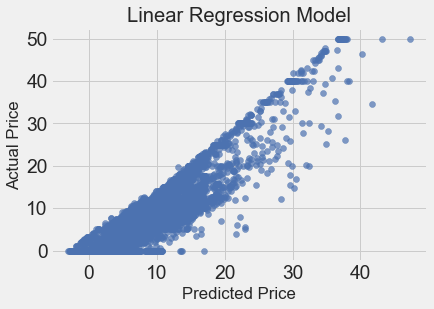

In [58]:
#actual_values = y_test
plt.scatter(Feb_pred, Tip1, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [59]:
#Randomforest prediction
Feb_pred1 = rf.predict(data3)

In [60]:
print ('MSE for Random forest regressor Feb month : \n', mean_squared_error(Tip1, Feb_pred1))

MSE for Random forest regressor Feb month : 
 1.2750782062727979


In [61]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print ('R^2 for linear reression is: \n', r2_score(Tip1, Feb_pred))

R^2 for linear reression is: 
 0.865813223275414


In [62]:
print ('R^2 for randomforest regressor is: \n', r2_score(Tip1, Feb_pred1))

R^2 for randomforest regressor is: 
 0.7199352479250776


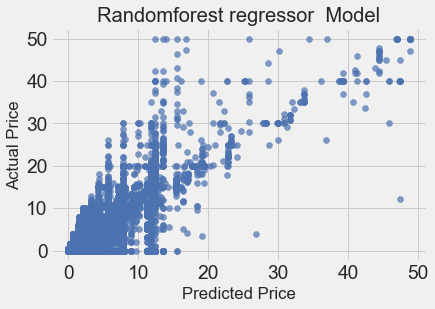

In [63]:
#actual_values = y_test
plt.scatter(Feb_pred1, Tip1, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Randomforest regressor  Model')
plt.show()